# Parameter Recovery and Model Recovery

In [1]:
%load_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib notebook

import numpy as np
from run_model_recovery import *
import multiprocessing as mp

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

## 1. Paremeter Recovery (Fig. 4  in Wilson and Collins 2019)

### 1.1 LossCounting

If we fix threshold_std = 0, perfect. Note that the para_bounds are still [0,50],[0,10]

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 30/30 [03:36<00:00,  7.20s/it]


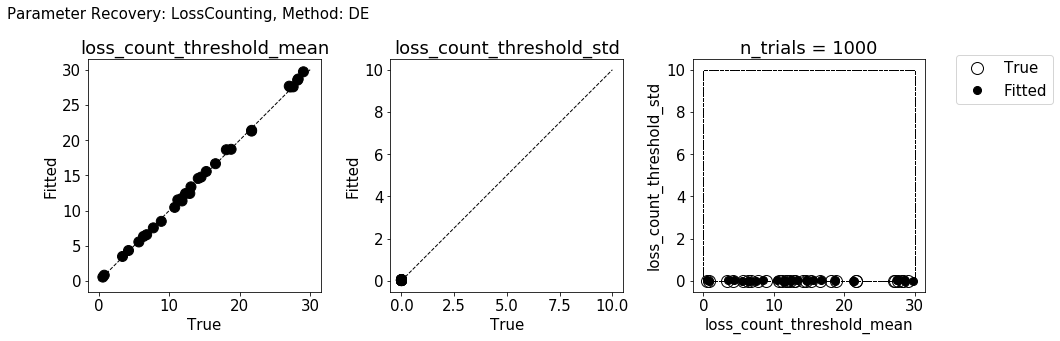

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[30,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,0]], n_models = 30, method = 'random_uniform')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'DE', pool = pool);    


If we allow loss_count_threshold_std

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:30<00:00,  6.00s/it]


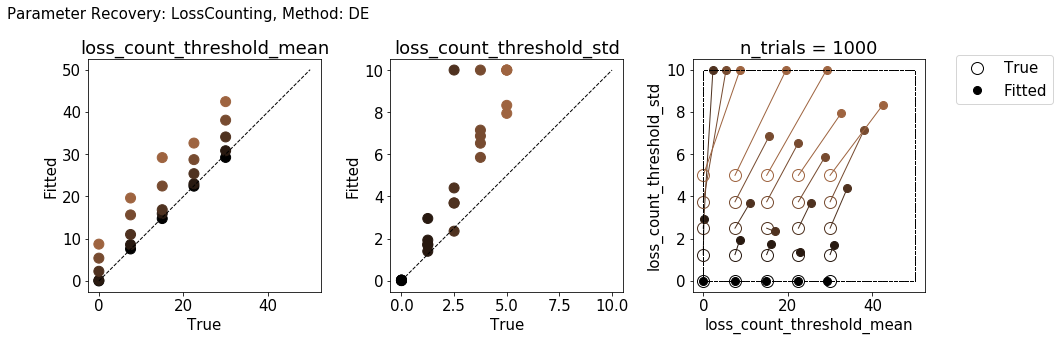

In [4]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'DE', pool = pool);    

### Likelihood landscape and DE history (Fig.3a in Wilson and Collins 2019)

Likelihood landscape plots show that this is not due to the fitting per se, but because of a systematic bias introduced by the inherent correlation between loss count threshold mean and std.

Note: only `DE` has this plot because I have difficulty storing the intermediate results in callbacks during paralleling local optimizers.

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 114.65it/s]


Fitting using DE, n_x0s = 1, pool = True...


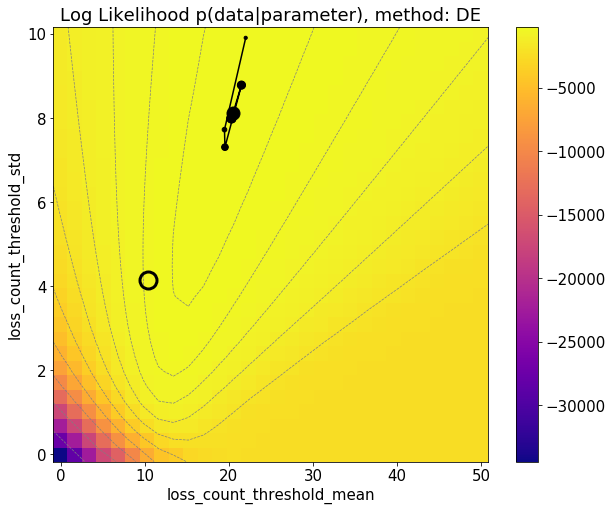

In [5]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,4]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'DE', pool = pool);


No such bias when true_std = 0

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 113.87it/s]


Fitting using DE, n_x0s = 1, pool = True...


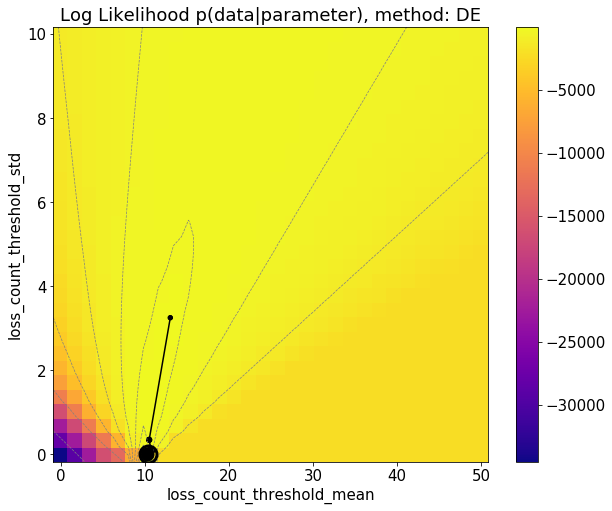

In [6]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,0]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'DE', pool = pool);

### Compare global optimizer with local optimizer (with `n_x0s` different initializations)

The results suggest that both methods are good!! (at least for now)
- Global optimizer (`DE`): use its own parallel method
- Local optimizer (`L-BFGS-B`, `SLSQP`, `TNC`, `trust-constr`): random initialization in parallel
    - Speed: L-BFGS-B = SLSQP  >> TNC >>> trust-constr

#### DE

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:32<00:00,  6.11s/it]


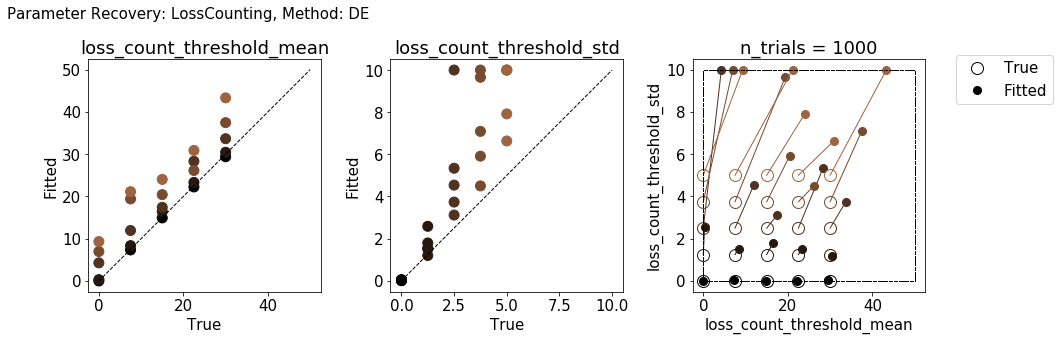

In [7]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'DE', pool = pool);    

#### L-BFGS-B

`n_x0s` = 1: Lots of local minima!!

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [01:25<00:00,  3.43s/it]


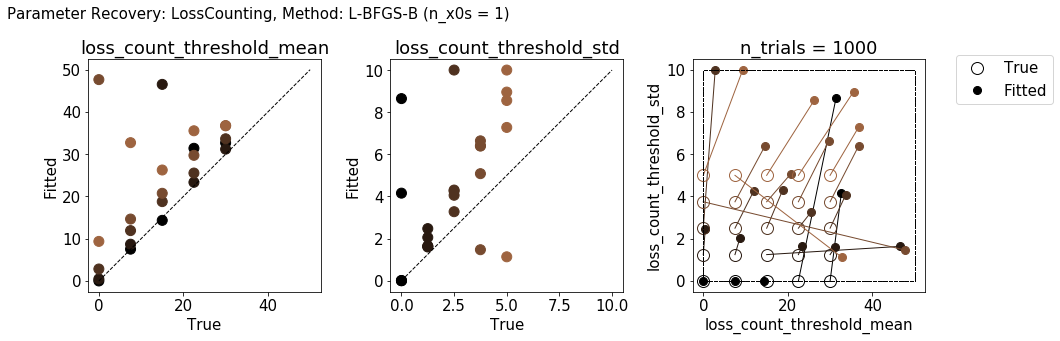

In [2]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'L-BFGS-B', n_x0s = 1, pool = pool);    

`n_x0s` = 8: no local optima issue! (in parallel)

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:53<00:00,  6.95s/it]


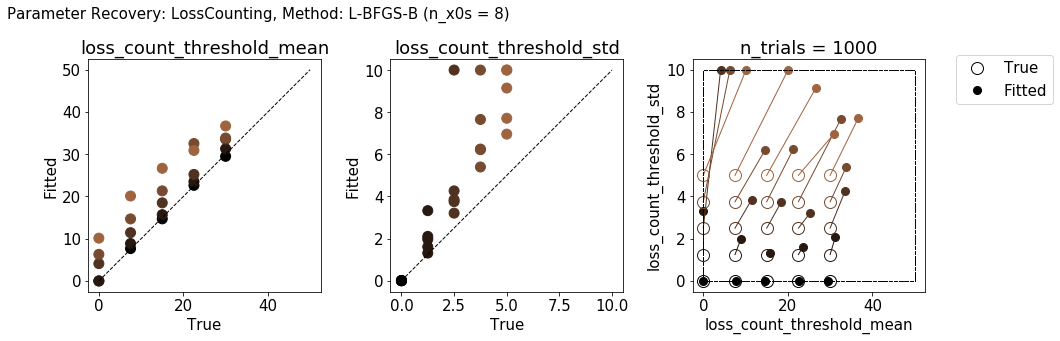

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'L-BFGS-B', n_x0s = 8, pool = pool);    

`n_x0s` = 16: very robust, but slow. Not necessary.

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [05:20<00:00, 12.82s/it]


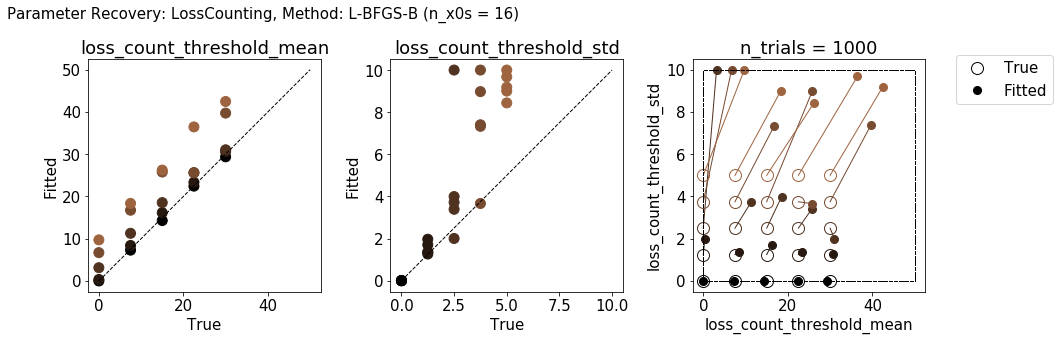

In [4]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'L-BFGS-B', n_x0s = 16, pool = pool);    

#### SLSQP (seems to be faster than L-BFGS-B?)

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:38<00:00,  6.32s/it]


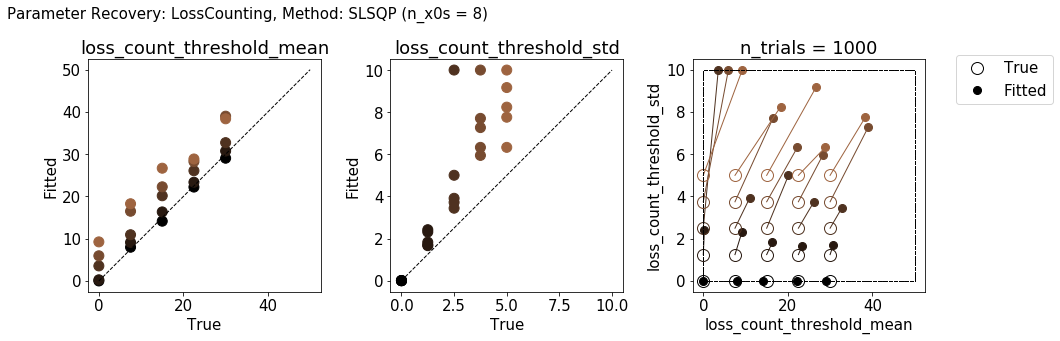

In [5]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'SLSQP', n_x0s = 8, pool = pool);    

#### ~TNC (too slow!!!)~

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [11:09<00:00, 26.80s/it]


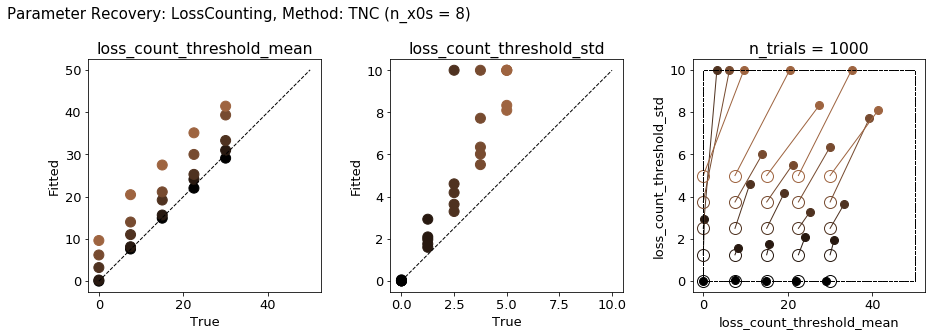

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'TNC', n_x0s = 8, pool = pool);    

#### ~trust-constr (toooooooo slow)~

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [09:26<00:00, 22.64s/it]


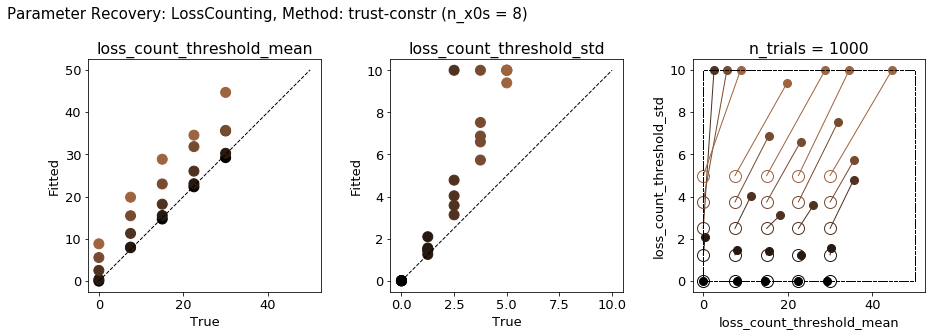

In [4]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'trust-constr', n_x0s = 8, pool = pool);    

### Multiple initialization on the likelihood landscape

Let's plot multiple histories of local optimizers (must be serial in this case). <br>
Note the dots on the southeastern plateau. They failed to converge due to bad initializations. 

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 117.70it/s]


Fitting using L-BFGS-B, n_x0s = 8, pool = False...


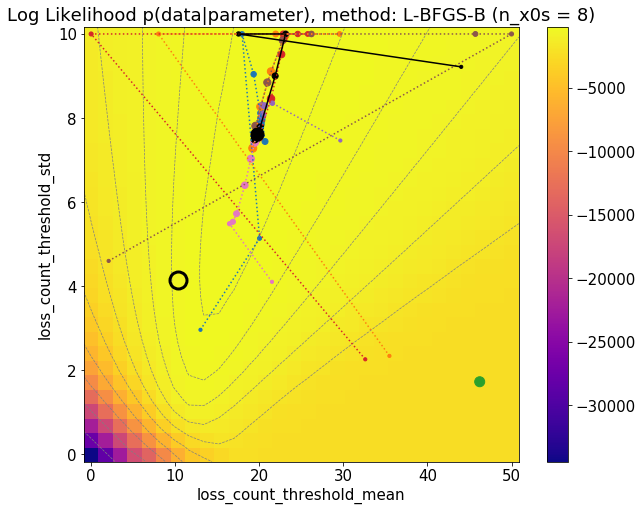

In [10]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,4]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'L-BFGS-B', n_x0s = 8, pool = '');


compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 114.68it/s]


Fitting using L-BFGS-B, n_x0s = 8, pool = False...


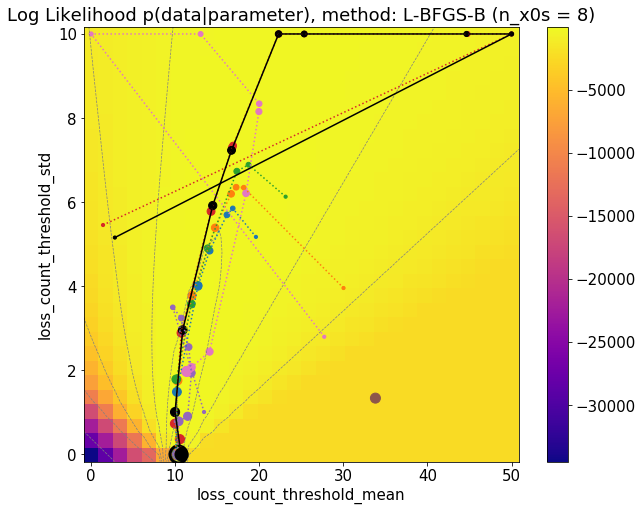

In [7]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,0]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'L-BFGS-B', n_x0s = 8, pool = '');
